In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from scipy.stats import linregress
from pprint import pprint
import json
from datetime import datetime 

# Pull source UI file
ui_clean = pd.read_csv("../Resources/ui_clean.csv")
ui_clean['Year'] = pd.DatetimeIndex(ui_clean['Reflecting Week Ended']).year
ui_clean.head(2)

,State,Filed week ended,Initial Claims,Reflecting Week Ended,Continued Claims,Covered Employment,Insured Unemployment Rate,Weeknum,Year
0,California,2015-01-03,"40,784",2014-12-27,"420,154","15,245,478",2.76,52,2014
1,California,2015-01-10,"66,906",2015-01-03,"423,923","15,354,250",2.76,1,2015


In [2]:
ui_2020_parse = ui_clean[ui_clean["Year"] == 2020]
ui_2020 = ui_2020_parse.groupby(['State', 'Weeknum'])["Insured Unemployment Rate"].mean()
ui_2020 = pd.DataFrame(ui_2020)
ui_2020.to_csv("../Resources/ui_2020.csv", index=True)
ui_2020.head(2)

Insured Unemployment Rate
State      Weeknum                           
California 1                             2.06
           2                             2.18

Text(0.5, 1.0, '2020 Weekly Unemployment % by State')

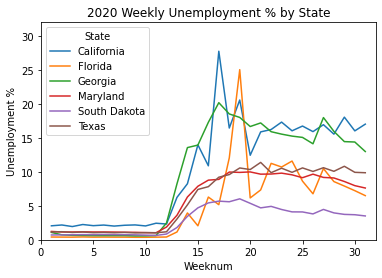

In [3]:
ui_2020.pivot_table('Insured Unemployment Rate', index='Weeknum', columns='State', aggfunc='mean').plot()
plt.axis([0, 32, 0, 32])
plt.ylabel('Unemployment %')
plt.title("2020 Weekly Unemployment % by State")

In [ ]:
###############################

In [4]:
# Pull source ad file
ad_df = pd.read_csv("../Resources/ad_clean.csv")
ad_df.head(2)

,Indicator,Group,State,Subgroup,Week,Week Label,Value,Low CI,High CI,Confidence Interval,Quartile range,Weeknum
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,2020-04-23,23.5,22.7,24.3,22.7 - 24.3,NaN,17
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,2020-04-23,32.7,30.2,35.2,30.2 - 35.2,NaN,17


In [5]:
ad_cal = ad_df[ad_df["State"] == "California"]
ad_cal.head(2)

,Indicator,Group,State,Subgroup,Week,Week Label,Value,Low CI,High CI,Confidence Interval,Quartile range,Weeknum
23,Symptoms of Depressive Disorder,By State,California,California,1,2020-04-23,25.4,22.5,28.6,22.5 - 28.6,24.1 - 28.7,17
93,Symptoms of Anxiety Disorder,By State,California,California,1,2020-04-23,30.8,28.2,33.5,28.2 - 33.5,30.4 - 31.6,17


In [6]:
ad_cal_group = ad_cal.groupby(['State', 'Weeknum'])["Value"].mean()
ad_cal_group = pd.DataFrame(ad_cal_group)
ad_cal_group.to_csv("../Resources/ad_2020.csv", index=True)
ad_cal_group.head(2)

Value
State      Weeknum           
California 17       31.200000
           19       29.533333

In [7]:
ad_fla = ad_df[ad_df["State"] == "Florida"]
ad_fla_group = ad_fla.groupby(['State', 'Weeknum'])["Value"].mean()
ad_fla_group = pd.DataFrame(ad_fla_group)
ad_fla_group.to_csv("../Resources/ad_2020.csv", index=True)
ad_fla_group.head(2)

Value
State   Weeknum           
Florida 17       30.633333
        19       28.666667

In [8]:
ad_ga = ad_df[ad_df["State"] == "Georgia"]
ad_ga_group = ad_ga.groupby(['State', 'Weeknum'])["Value"].mean()
ad_ga_group = pd.DataFrame(ad_ga_group)
ad_ga_group.to_csv("../Resources/ad_2020.csv", index=True)
ad_ga_group.head(2)

Value
State   Weeknum           
Georgia 17       31.233333
        19       29.800000

In [9]:
ad_md = ad_df[ad_df["State"] == "Maryland"]
ad_md_group = ad_md.groupby(['State', 'Weeknum'])["Value"].mean()
ad_md_group = pd.DataFrame(ad_md_group)
ad_md_group.to_csv("../Resources/ad_2020.csv", index=True)
ad_md_group.head(2)

Value
State    Weeknum           
Maryland 17       27.166667
         19       29.766667

In [10]:
ad_sd = ad_df[ad_df["State"] == "South Dakota"]
ad_sd_group = ad_sd.groupby(['State', 'Weeknum'])["Value"].mean()
ad_sd_group = pd.DataFrame(ad_sd_group)
ad_sd_group.to_csv("../Resources/ad_2020.csv", index=True)
ad_sd_group.head(2)

Value
State        Weeknum           
South Dakota 17       21.733333
             19       25.466667

In [11]:
ad_tx = ad_df[ad_df["State"] == "Texas"]
ad_tx_group = ad_tx.groupby(['State', 'Weeknum'])["Value"].mean()
ad_tx_group = pd.DataFrame(ad_tx_group)
ad_tx_group.to_csv("../Resources/ad_2020.csv", index=True)
ad_tx_group.head(2)

Value
State Weeknum           
Texas 17       29.666667
      19       31.333333

In [12]:
cal_fla = ad_cal_group.append(ad_fla_group)
cal_fla_ga = cal_fla.append(ad_ga_group)
cal_fla_ga_md =cal_fla_ga.append(ad_md_group)
cal_fla_ga_md_sd = cal_fla_ga_md .append(ad_sd_group)
ad_all_df = cal_fla_ga_md_sd .append(ad_tx_group)

ad_all_df = pd.DataFrame(ad_all_df)
ad_all_df.to_csv("../Resources/ad_all_df.csv", index=True)

ad_all_df.head()

Value
State      Weeknum           
California 17       31.200000
           19       29.533333
           20       33.266667
           21       31.166667
           22       33.100000

In [13]:
ad_all_df = ad_all_df.rename(columns={"Value": "Anxiety"})
ui_ad_forscatter = pd.merge(ad_all_df, ui_2020, how= "outer", on = ["State", "Weeknum"])
ui_ad_forscatter = ui_ad_forscatter.reset_index()
ui_ad_forscatter

,State,Weeknum,Anxiety,Insured Unemployment Rate
0,California,17,31.200000,27.75
1,California,19,29.533333,20.57
2,California,20,33.266667,12.44
3,California,21,31.166667,15.88
4,California,22,33.100000,16.23
...,...,...,...,...
181,Texas,15,NaN,7.41
182,Texas,16,NaN,7.82
183,Texas,18,NaN,9.60
184,Texas,30,NaN,9.93


In [14]:
ui_ad_scat_clean = ui_ad_forscatter.dropna(how='any')
ui_ad_scat_clean

,State,Weeknum,Anxiety,Insured Unemployment Rate
0,California,17,31.200000,27.75
1,California,19,29.533333,20.57
2,California,20,33.266667,12.44
3,California,21,31.166667,15.88
4,California,22,33.100000,16.23
...,...,...,...,...
67,Texas,25,31.300000,10.58
68,Texas,26,34.933333,10.06
69,Texas,27,36.066667,10.61
70,Texas,28,39.566667,10.08


R Val is 0.0829826252613376


Text(15, 23, 'y = 0.22x + 29.0')

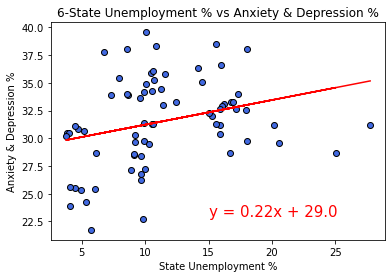

In [15]:
#plotting and formatting scatter
plt.scatter(ui_ad_scat_clean['Insured Unemployment Rate'], ui_ad_scat_clean['Anxiety'],marker="o", facecolors="royalblue", edgecolors="black")

#inserting chart labels
plt.xlabel("State Unemployment %")
plt.ylabel("Anxiety & Depression %")
plt.title("6-State Unemployment % vs Anxiety & Depression %")

#defining values
x_values = ui_ad_scat_clean['Insured Unemployment Rate']
y_values = ui_ad_scat_clean['Anxiety']

#defining stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Defining regression
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plotting line regress
plt.plot(x_values,regress_values,"r-")

#Printing R Value
print(f"R Val is {rvalue**2}")

#Plotting line equation on the graph
plt.annotate(line_eq,(15, 23),fontsize=15,color="red") 

The R Value was low suggesting there was a low correlation between Unemployment % compared to Anxiety and Depression %

In [30]:
ui_scat_cal = ui_ad_scat_clean[ui_ad_scat_clean["State"] == "California"]
ui_scat_cal.head(2)

,State,Weeknum,Anxiety,Insured Unemployment Rate
0,California,17,31.200000,27.75
1,California,19,29.533333,20.57


R Val is 0.10906823914766026


Text(21, 35, 'y = -0.23x + 37.4')

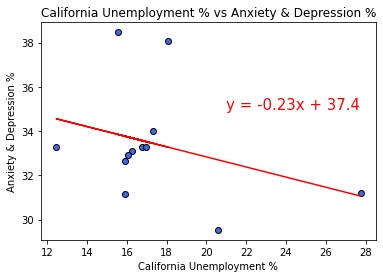

In [37]:
#plotting and formatting scatter
plt.scatter(ui_scat_cal['Insured Unemployment Rate'], ui_scat_cal['Anxiety'],marker="o", facecolors="royalblue", edgecolors="black")

#inserting chart labels
plt.xlabel("California Unemployment %")
plt.ylabel("Cali Anxiety & Depression %")
plt.title("Cali Unemployment % vs Anxiety & Depression %")

#defining values
x_values = ui_scat_cal['Insured Unemployment Rate']
y_values = ui_scat_cal['Anxiety']

#defining stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Defining regression
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plotting line regress
plt.plot(x_values,regress_values,"r-")

#Printing R Value
print(f"R Val is {rvalue**2}")

#Plotting line equation on the graph
plt.annotate(line_eq,(21,35),fontsize=15,color="red") 

In [31]:
ui_scat_ga = ui_ad_scat_clean[ui_ad_scat_clean["State"] == "Georgia"]
ui_scat_ga.head(2)

,State,Weeknum,Anxiety,Insured Unemployment Rate
24,Georgia,17,31.233333,20.18
25,Georgia,19,29.800000,18.01


R Val is 0.22991357095945644


Text(17, 35, 'y = -0.68x + 43.6')

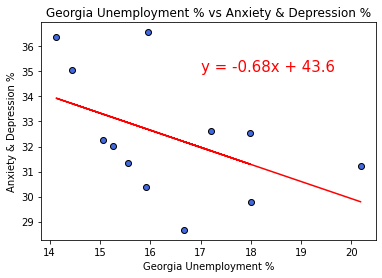

In [39]:
#plotting and formatting scatter
plt.scatter(ui_scat_ga['Insured Unemployment Rate'], ui_scat_ga['Anxiety'],marker="o", facecolors="royalblue", edgecolors="black")

#inserting chart labels
plt.xlabel("Georgia Unemployment %")
plt.ylabel("Georgia Anxiety & Depression %")
plt.title("Georgia Unemployment % vs Anxiety & Depression %")

#defining values
x_values = ui_scat_ga['Insured Unemployment Rate']
y_values = ui_scat_ga['Anxiety']

#defining stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Defining regression
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plotting line regress
plt.plot(x_values,regress_values,"r-")

#Printing R Value
print(f"R Val is {rvalue**2}")

#Plotting line equation on the graph
plt.annotate(line_eq,(17,35),fontsize=15,color="red") 

In [32]:
ui_scat_fl = ui_ad_scat_clean[ui_ad_scat_clean["State"] == "Florida"]
ui_scat_fl.head(2)

,State,Weeknum,Anxiety,Insured Unemployment Rate
12,Florida,17,30.633333,5.17
13,Florida,19,28.666667,25.04


R Val is 0.10769390458282137


Text(16, 35, 'y = -0.2x + 36.04')

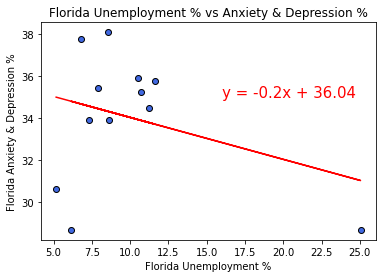

In [41]:
#plotting and formatting scatter
plt.scatter(ui_scat_fl['Insured Unemployment Rate'], ui_scat_fl['Anxiety'],marker="o", facecolors="royalblue", edgecolors="black")

#inserting chart labels
plt.xlabel("Florida Unemployment %")
plt.ylabel("Florida Anxiety & Depression %")
plt.title("Florida Unemployment % vs Anxiety & Depression %")

#defining values
x_values = ui_scat_fl['Insured Unemployment Rate']
y_values = ui_scat_fl['Anxiety']

#defining stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Defining regression
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plotting line regress
plt.plot(x_values,regress_values,"r-")

#Printing R Value
print(f"R Val is {rvalue**2}")

#Plotting line equation on the graph
plt.annotate(line_eq,(16,35),fontsize=15,color="red") 

In [42]:
ui_scat_md = ui_ad_scat_clean[ui_ad_scat_clean["State"] == "Maryland"]
ui_scat_md.head(2)

,State,Weeknum,Anxiety,Insured Unemployment Rate
36,Maryland,17,27.166667,8.89
37,Maryland,19,29.766667,9.92


R Val is 0.21517575379459852


Text(8.7, 24, 'y = -3.25x + 59.27')

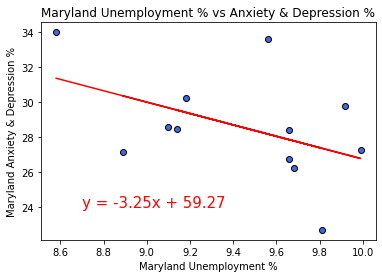

In [44]:
#plotting and formatting scatter
plt.scatter(ui_scat_md['Insured Unemployment Rate'], ui_scat_md['Anxiety'],marker="o", facecolors="royalblue", edgecolors="black")

#inserting chart labels
plt.xlabel("Maryland Unemployment %")
plt.ylabel("Maryland Anxiety & Depression %")
plt.title("Maryland Unemployment % vs Anxiety & Depression %")

#defining values
x_values = ui_scat_md['Insured Unemployment Rate']
y_values = ui_scat_md['Anxiety']

#defining stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Defining regression
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plotting line regress
plt.plot(x_values,regress_values,"r-")

#Printing R Value
print(f"R Val is {rvalue**2}")

#Plotting line equation on the graph
plt.annotate(line_eq,(8.7,24),fontsize=15,color="red") 

In [34]:
ui_scat_sd = ui_ad_scat_clean[ui_ad_scat_clean["State"] == "South Dakota"]
ui_scat_sd.head(2)

,State,Weeknum,Anxiety,Insured Unemployment Rate
48,South Dakota,17,21.733333,5.69
49,South Dakota,19,25.466667,6.03


R Val is 0.3455963787349898


Text(5, 29, 'y = -2.57x + 38.96')

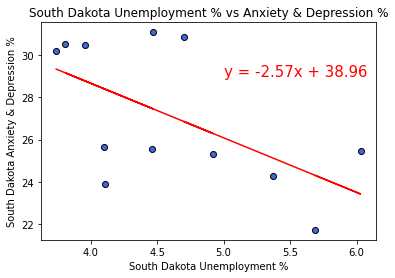

In [46]:
#plotting and formatting scatter
plt.scatter(ui_scat_sd['Insured Unemployment Rate'], ui_scat_sd['Anxiety'],marker="o", facecolors="royalblue", edgecolors="black")

#inserting chart labels
plt.xlabel("South Dakota Unemployment %")
plt.ylabel("South Dakota Anxiety & Depression %")
plt.title("South Dakota Unemployment % vs Anxiety & Depression %")

#defining values
x_values = ui_scat_sd['Insured Unemployment Rate']
y_values = ui_scat_sd['Anxiety']

#defining stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Defining regression
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plotting line regress
plt.plot(x_values,regress_values,"r-")

#Printing R Value
print(f"R Val is {rvalue**2}")

#Plotting line equation on the graph
plt.annotate(line_eq,(5, 29),fontsize=15,color="red") 

In [35]:
ui_scat_tx = ui_ad_scat_clean[ui_ad_scat_clean["State"] == "Texas"]
ui_scat_tx.head(2)

,State,Weeknum,Anxiety,Insured Unemployment Rate
60,Texas,17,29.666667,9.21
61,Texas,19,31.333333,10.57


R Val is 0.0576020984535148


Text(9.5, 37, 'y = 1.4x + 19.13')

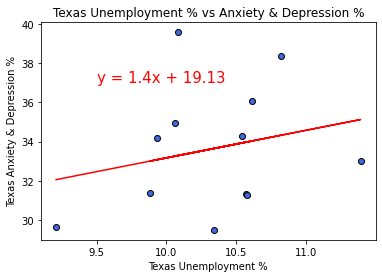

In [49]:
#plotting and formatting scatter
plt.scatter(ui_scat_tx['Insured Unemployment Rate'], ui_scat_tx['Anxiety'],marker="o", facecolors="royalblue", edgecolors="black")

#inserting chart labels
plt.xlabel("Texas Unemployment %")
plt.ylabel("Texas Anxiety & Depression %")
plt.title("Texas Unemployment % vs Anxiety & Depression %")

#defining values
x_values = ui_scat_tx['Insured Unemployment Rate']
y_values = ui_scat_tx['Anxiety']

#defining stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Defining regression
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plotting line regress
plt.plot(x_values,regress_values,"r-")

#Printing R Value
print(f"R Val is {rvalue**2}")

#Plotting line equation on the graph
plt.annotate(line_eq,(9.5, 37),fontsize=15,color="red") 